## Kucoin Crypto Data In Python


Using the Kucoin crypto exchange API to obtain data into Python.

The end goal is to produce candlestick price charts to show price action on various crypto trading pairs.

Reference: https://python-kucoin.readthedocs.io/en/latest/




## Topics

* Setup
* Exploring Some Functions
* Obtain Historical Data on ETH-USDT
* A Candlestick Chart
* Creating A Function For Producing Candlestick Charts

API info can be obtained from Kucoin: https://www.kucoin.com/account/api

You need an api_key, a passphrase and a secret api key.

In [32]:
# API info (not shown)

api_key = 

passphrase = 

secret = 


In [33]:
from kucoin.client import Client
import pandas as pd

In [34]:
# Use API info into Client()

client = Client(api_key, secret, passphrase)

In [35]:
# Obtain currencies

currencies = client.get_currencies()

In [36]:
# Show first three cryptocurrencies.

currencies[0:3]

[{'currency': 'CSP',
  'name': 'CSP',
  'fullName': 'Caspian',
  'precision': 8,
  'confirms': 12,
  'contractAddress': '0xa6446d655a0c34bc4f05042ee88170d056cbaf45',
  'withdrawalMinSize': '2000',
  'withdrawalMinFee': '500',
  'isWithdrawEnabled': True,
  'isDepositEnabled': True,
  'isMarginEnabled': False,
  'isDebitEnabled': False},
 {'currency': 'LOKI',
  'name': 'OXEN',
  'fullName': 'Oxen',
  'precision': 8,
  'confirms': 10,
  'contractAddress': '',
  'withdrawalMinSize': '2',
  'withdrawalMinFee': '2',
  'isWithdrawEnabled': True,
  'isDepositEnabled': True,
  'isMarginEnabled': False,
  'isDebitEnabled': True},
 {'currency': 'NRG',
  'name': 'NRG',
  'fullName': 'Energi',
  'precision': 8,
  'confirms': 5000,
  'contractAddress': '',
  'withdrawalMinSize': '0.3',
  'withdrawalMinFee': '0.2',
  'isWithdrawEnabled': True,
  'isDepositEnabled': True,
  'isMarginEnabled': False,
  'isDebitEnabled': True}]

In [37]:
# Get crypto and name from currencies with list comprehension:

crypto_names = pd.DataFrame(currencies)[['currency', 'name', 'fullName']]

In [38]:
# Crypto Names as dataframe:

crypto_names.head(12)

,currency,name,fullName
0,CSP,CSP,Caspian
1,LOKI,OXEN,Oxen
2,NRG,NRG,Energi
3,FET,FET,Fetch.Ai
4,XMR,XMR,Monero
5,RBTC,RBTC,RSK Smart Bitcoin
6,RIF,RIF,RIF Token
7,ANKR,ANKR,Ankr Network
8,DX,DX,DxChain
9,MTV,MTV,MultiVAC


In [39]:
# Markets List
markets = client.get_markets()

markets

['USDS', 'BTC', 'KCS', 'ALTS', 'DeFi', 'NFT', 'Polkadot', 'ETF']

In [40]:
# Crypto Trading Pairs:

crypto_pairs = client.get_symbols()

In [41]:
crypto_pairs[0:3]

[{'symbol': 'REQ-ETH',
  'name': 'REQ-ETH',
  'baseCurrency': 'REQ',
  'quoteCurrency': 'ETH',
  'feeCurrency': 'ETH',
  'market': 'ALTS',
  'baseMinSize': '1',
  'quoteMinSize': '0.0001',
  'baseMaxSize': '10000000000',
  'quoteMaxSize': '99999999',
  'baseIncrement': '0.0001',
  'quoteIncrement': '0.0000001',
  'priceIncrement': '0.0000001',
  'priceLimitRate': '0.1',
  'isMarginEnabled': False,
  'enableTrading': True},
 {'symbol': 'REQ-BTC',
  'name': 'REQ-BTC',
  'baseCurrency': 'REQ',
  'quoteCurrency': 'BTC',
  'feeCurrency': 'BTC',
  'market': 'BTC',
  'baseMinSize': '1',
  'quoteMinSize': '0.00001',
  'baseMaxSize': '10000000000',
  'quoteMaxSize': '99999999',
  'baseIncrement': '0.0001',
  'quoteIncrement': '0.00000001',
  'priceIncrement': '0.00000001',
  'priceLimitRate': '0.1',
  'isMarginEnabled': False,
  'enableTrading': True},
 {'symbol': 'NULS-ETH',
  'name': 'NULS-ETH',
  'baseCurrency': 'NULS',
  'quoteCurrency': 'ETH',
  'feeCurrency': 'ETH',
  'market': 'ALTS',
  

In [42]:
# Extract crypto pairs:

crypto_pairs_list = [x['symbol'] for x in crypto_pairs]

crypto_pairs_list[0:3]

['REQ-ETH', 'REQ-BTC', 'NULS-ETH']

In [43]:
# Obtaining klines data for Kucoin priced in BTC:
# Reference: https://python-kucoin.readthedocs.io/en/latest/market.html

klines = client.get_kline_data('KCS-BTC')

klines[0:3]

[['1627309500',
  '0.0002613',
  '0.0002611',
  '0.0002613',
  '0.0002611',
  '9.5877',
  '0.00250437112'],
 ['1627309200',
  '0.0002617',
  '0.0002622',
  '0.0002623',
  '0.0002611',
  '163.9875',
  '0.04287940821'],
 ['1627308900',
  '0.0002626',
  '0.0002616',
  '0.0002626',
  '0.0002616',
  '86.0123',
  '0.02255832549']]

**Klines Data**

From https://python-kucoin.readthedocs.io/en/latest/market.html

Parameters:	

* symbol (string) – Name of symbol e.g. KCS-BTC
* kline_type (string) – type of symbol, type of candlestick patterns: 1min, 3min, 5min, 15min, 30min, 1hour, 2hour, 4hour, 6hour, 8hour, 12hour, 1day, 1week
* start (int) – Start time as unix timestamp (optional) default start of day in UTC
* end (int) – End time as unix timestamp (optional) default now in UTC

API Response (Output):

List of lists. 

Each element/list contains the following.

* Start time of candle style
* Opening Price
* Closing Price
* Highest Price
* Lowest Price
* Transaction amount
* Transaction volume

## Obtain Historical Data on ETH-USDT

In [44]:
# Converting dates into UNIX time format:

import datetime
from datetime import date
import time


# Start timepoint:

first_time = datetime.date(2019, 4, 13)

unixtime1 = int(time.mktime(first_time.timetuple()))


# End timepoint:

today = date.today()

unixtime2 = int(time.mktime(today.timetuple()))

In [45]:
# Obtain ETH-USDT daily candlestick prices with UNIX times:

eth_usdt_klines = client.get_kline_data('ETH-USDT', '1day', unixtime1, unixtime2)

In [46]:
eth_usdt_klines[0:3]

[['1627257600',
  '2189.8',
  '2345.25',
  '2391.01',
  '2171',
  '82820.64133066',
  '191833754.0121363'],
 ['1627171200',
  '2184',
  '2190.41',
  '2196.78',
  '2107.11',
  '81661.23591305',
  '175985681.8844099811'],
 ['1627084800',
  '2125.35',
  '2184',
  '2200',
  '2100.6',
  '66209.99484096',
  '142385704.6586829963']]

In [47]:
# Convert into a pandas dataframe:

eth_usdt_df = pd.DataFrame(eth_usdt_klines)

eth_usdt_df.head(8)

,0,1,2,3,4,5,6
0,1627257600,2189.8,2345.25,2391.01,2171,82820.64133066,191833754.0121363
1,1627171200,2184,2190.41,2196.78,2107.11,81661.23591305,175985681.8844099811
2,1627084800,2125.35,2184,2200,2100.6,66209.99484096,142385704.6586829963
3,1626998400,2024.2,2124.64,2130.72,1996,67036.84284045,137560421.5720340028
4,1626912000,1995.72,2024.82,2046.2,1948.43,65773.36814424,131572654.703571017
5,1626825600,1785.63,1995.24,2033.4,1752.59,91276.06305687,175226545.9902715557
6,1626739200,1818.72,1785,1841.33,1718.18,87207.77722761,154007572.6342048645
7,1626652800,1891.68,1818.53,1918.76,1804,41264.02638512,76380951.5165110429


In [48]:
# Rename columns:

column_names = ['Start Time', 'Open', 'Close', 'High', 'Low', 'Transaction amount', 'Volume']

In [49]:
eth_usdt_df.columns = column_names

In [50]:
# Check data types:

eth_usdt_df.dtypes

Start Time            object
Open                  object
Close                 object
High                  object
Low                   object
Transaction amount    object
Volume                object
dtype: object

In [51]:
# Change columns to numeric:

eth_usdt_df = eth_usdt_df[column_names].apply(pd.to_numeric)

In [52]:
# Check data types:

eth_usdt_df.dtypes

Start Time              int64
Open                  float64
Close                 float64
High                  float64
Low                   float64
Transaction amount    float64
Volume                float64
dtype: object

In [53]:
# Convert start time into date format:

eth_usdt_df['Start Time'] = pd.to_datetime(eth_usdt_df['Start Time'], unit = 's')

In [54]:
eth_usdt_df.head(8)

,Start Time,Open,Close,High,Low,Transaction amount,Volume
0,2021-07-26,2189.80,2345.25,2391.01,2171.00,82820.641331,1.918338e+08
1,2021-07-25,2184.00,2190.41,2196.78,2107.11,81661.235913,1.759857e+08
2,2021-07-24,2125.35,2184.00,2200.00,2100.60,66209.994841,1.423857e+08
3,2021-07-23,2024.20,2124.64,2130.72,1996.00,67036.842840,1.375604e+08
4,2021-07-22,1995.72,2024.82,2046.20,1948.43,65773.368144,1.315727e+08
5,2021-07-21,1785.63,1995.24,2033.40,1752.59,91276.063057,1.752265e+08
6,2021-07-20,1818.72,1785.00,1841.33,1718.18,87207.777228,1.540076e+08
7,2021-07-19,1891.68,1818.53,1918.76,1804.00,41264.026385,7.638095e+07


In [55]:
# Sorting in ascending order for Start Time to make sure mplfinance plot works out:

eth_usdt_df = eth_usdt_df.sort_values(by = "Start Time", ascending = True)

## Candlestick Price Chart With Python's mplfinance

In [56]:
import mplfinance as mpf

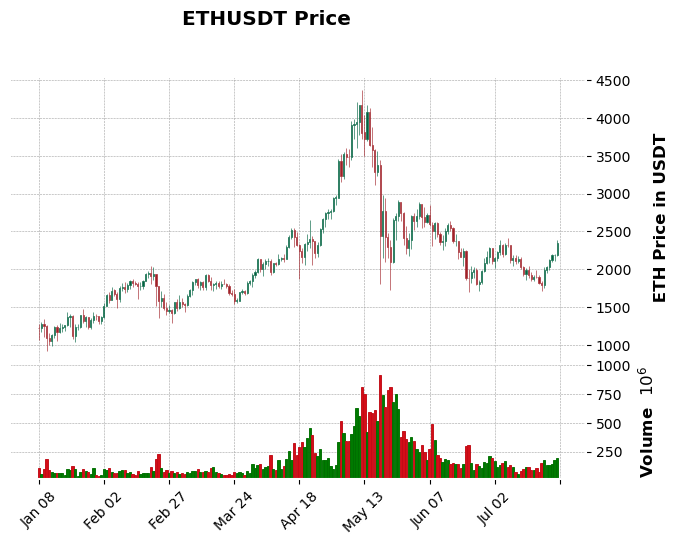

In [57]:
# Candlestick plot of ETHUSDT

mpf.plot(eth_usdt_df.set_index('Start Time').tail(200),
         type = 'candle', style = 'charles',
         volume = True,
         title = "ETHUSDT Price",
         ylabel = '\n ' + 'ETH Price in USDT'
)

## Creating A Function For Producing Candlestick Charts

The above steps can be combines altogether into a function.

Inputs would include the user's input of crypto trading tickers, a timeframe,a start date and the current date.

Base/Quote i.e. BTC/USDT where BTC is base currency and USDT is quote currency.

The single output is the candlestick chart for price action and volume.


In [58]:
# Create plotting function:

def kucoin_candlestick_chart(base_cur, quote_cur, timeframe, start_date, end_date, num_periods = 200):
    
    # Get trading pair:
    pair = base_cur + "-" + quote_cur
    
    # Convert start and end dates into UNIX epoch time format:
    
    unixtime1 = int(time.mktime(start_date.timetuple()))
    unixtime2 = int(time.mktime(end_date.timetuple()))
    
    # Obtain Kucoin Crypto Pairs:
    crypto_pairs = client.get_symbols()
    crypto_pairs_list = [x['symbol'] for x in crypto_pairs]
    
    # Check if user crypto pair is in the list for Kucoin:
    if pair not in crypto_pairs_list:
        return("Trading pair " + pair +" is not in Kucoin as a trading pair.")
    
    # Obtain kline_data if conditions are met:
    if timeframe in ['1min', '1hour', '12hour', '1day', '1week']:
        klines = client.get_kline_data(pair, timeframe, unixtime1, unixtime2)
    else:
        return("You chose " + timeframe + " for the time horizon. Please have one of "\
                + "1min, 1hour, 12hour, 1day or 1week for the timeframe.")
    
    # Produce pandas dataframe from klines:
    df = pd.DataFrame(klines)
    
    # Column Names:
    column_names = ['Start Time', 'Open', 'Close', 'High', 'Low', 'Transaction amount', 'Volume']
    
    # Renaming column names:
    df.columns = column_names
    
    # Change columns from object to numeric:
    df = df[column_names].apply(pd.to_numeric)
    
    # Convert start time into date format:
    df['Start Time'] = pd.to_datetime(df['Start Time'], unit = 's')
    
    # Sorting in ascending order for Start Time to make sure mplfinance plot works out:
    df = df.sort_values(by = "Start Time", ascending = True)
    
    # Candlestick Plot, obtain last 200 time periods.
    mpf.plot(df.set_index('Start Time').tail(num_periods),
         type = 'candle', style = 'charles',
         volume = True,
         title = "Price of " + pair,
         ylabel = '\n ' + base_cur + ' Price in ' + quote_cur)

In [59]:
# Invalid Function Call #1:

start = datetime.date(2019, 4, 13)
end = date.today()

kucoin_candlestick_chart(base_cur = 'THETA', quote_cur = 'USDT', timeframe = '2day', start_date = start, end_date = end)

'You chose 2day for the time horizon. Please have one of 1min, 1hour, 12hour, 1day or 1week for the timeframe.'

In [60]:
# Invalid Function Call #2:

start = datetime.date(2019, 4, 13)
end = date.today()

kucoin_candlestick_chart(base_cur = 'THETA', quote_cur = 'USDC', timeframe = '2day', start_date = start, end_date = end)

'Trading pair THETA-USDC is not in Kucoin as a trading pair.'

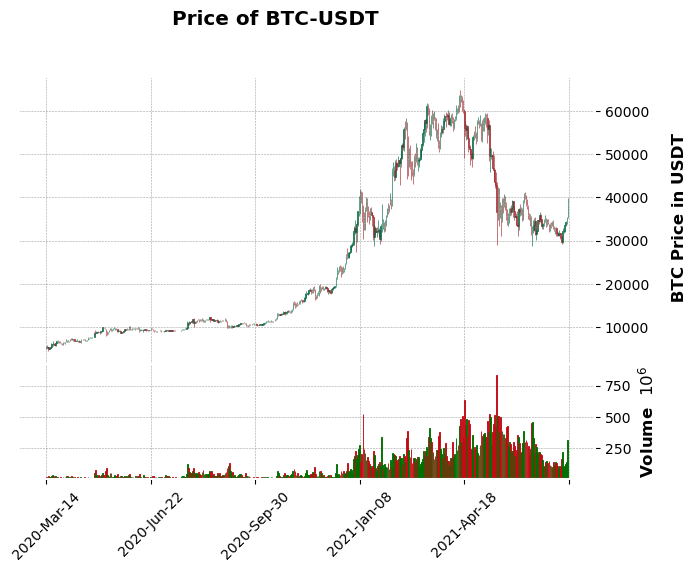

In [61]:
# Function Call #1 (Last 500 days) For Bitcoin - Tether

start = datetime.date(2018, 4, 13)
end = date.today()

kucoin_candlestick_chart(base_cur = 'BTC', quote_cur = 'USDT', 
                         timeframe = '1day', start_date = start, end_date = end,
                         num_periods = 500)

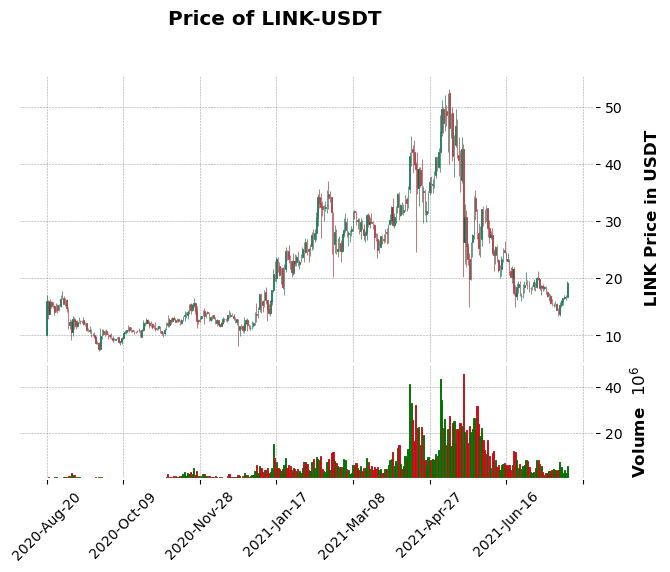

In [62]:
# Function Call #2 (Last 500 days) For Chainlink-Tether

start = datetime.date(2016, 1, 1)
end = date.today()

kucoin_candlestick_chart(base_cur = 'LINK', quote_cur = 'USDT', 
                         timeframe = '1day', start_date = start, end_date = end,
                         num_periods = 500)